In [ ]:
!pip install wavencoder

# install torchaudio for audio dataset
!pip install torchaudio

     |████████████████████████████████| 1.9MB 4.7MB/s 
     |████████████████████████████████| 1.7MB 18.0MB/s 
     |████████████████████████████████| 133kB 37.3MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 112kB 41.1MB/s 
     |████████████████████████████████| 645kB 38.3MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp37-none-any.whl size=141231 sha256=1cc1e255f0034f9ef61a695d8b086003ed4d9b4fc433bf5d65efafe6271499d1
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
Successfully built antlr4-python3-runtime
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# import wavencoder models and trainer
from wavencoder.models import Wav2Vec, LSTM_Attn_Classifier
from wavencoder.trainer import train, test_evaluate_classifier, test_predict_classifier

# import torch modules and torchaudio for data
import torchaudio
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, Dataset

import random
import IPython
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My\ Drive/ASR_Project_Shared

/content/gdrive/.shortcut-targets-by-id/1dovc8A9Q0Yu-3j97BcX_N4CGIbnUfGMF/ASR_Project_Shared


In [ ]:
import os

ROOT_PATH='./drive/MyDrive/ASR_Project_Shared/'
relative_path = 'final_metadata/denoised/'

train_file = './final_metadata/denoised/train_metadata_speech{all_clap}_noise{all_clap+noiseclips}.csv'


test_file_1 = './final_metadata/denoised/test_metadata_speech{all_clap}_noise{qut+spam} - test_metadata_speech{all_clap}_noise{qut+spam}.csv'

test_file_2 = './final_metadata/denoised/test_metadata_speech{all_clap}_noise{all_clap+noiseclips+spam} - test_metadata_speech{all_clap}_noise{all_clap+noiseclips+spam}.csv'


In [ ]:
import pandas as pd
train_df = pd.read_csv(train_file)

train_df.head()

,file_path,label
0,./final_data/noiseBINgte2_denoised/Hindi_clips...,0
1,./final_data/denoised_all_clap_speech/Marathi/...,1
2,./final_data/denoised_all_clap_speech/Tamil/22...,1
3,./final_data/denoised_all_clap_speech/Hindi/26...,1
4,./final_data/denoised_all_clap_speech/Hindi/24...,1


In [ ]:
file_names = list(train_df['file_path'])

In [ ]:
wave=[]
for i in file_names:
  waveform, sample_rate = torchaudio.load(i)
  wave.append(waveform)

print(wave)

[tensor([[-8.4639e-06, -1.5855e-05,  8.3447e-06,  ..., -3.5763e-07,
         -4.7684e-07, -2.3842e-07]]), tensor([[-1.4684e-03, -4.3259e-03,  1.6971e-03,  ...,  3.5882e-05,
          6.5327e-05,  2.0075e-04]]), tensor([[-1.0031e-03, -3.2480e-03,  4.6372e-05,  ..., -8.8488e-03,
         -1.0650e-02, -1.1385e-02]]), tensor([[ 0.0002, -0.0040, -0.0017,  ...,  0.0028,  0.0035,  0.0039]]), tensor([[-0.0020, -0.0039,  0.0017,  ...,  0.0002,  0.0002,  0.0003]]), tensor([[-3.2997e-04, -8.0580e-04,  1.5745e-03,  ..., -2.0540e-04,
         -1.4234e-04, -2.1100e-05]]), tensor([[-1.4331e-02, -2.1090e-02, -1.7453e-02,  ..., -2.9922e-05,
         -1.5378e-05, -1.7023e-04]]), tensor([[-5.2869e-05, -9.8884e-05,  5.1975e-05,  ...,  1.0431e-05,
          1.8120e-05,  1.1504e-05]]), tensor([[-1.2390e-03, -3.1304e-03,  8.4466e-04,  ...,  1.3578e-04,
          1.3667e-04, -2.5630e-05]]), tensor([[-0.0030, -0.0080, -0.0040,  ...,  0.0007,  0.0138,  0.0129]]), tensor([[-8.6784e-05, -1.6224e-04,  8.5235e-05, 

In [ ]:
train_df['waveform'] = wave

In [ ]:
test_df = pd.read_csv(test_file_1)
file_names1 = list(test_df['file_path'])

test_df1 = pd.read_csv(test_file_2)
file_names2 = list(test_df1['file_path'])

test_file_3 = './final_metadata/normal/test_metadata_speech{all_clap}_noise{qut+spam} - test_metadata_speech{all_clap}_noise{qut+spam}.csv'
test_df2 = pd.read_csv(test_file_3)
file_names3 = list(test_df2['file_path'])


test_file_4 = './final_metadata/normal/test_metadata_speech{all_clap}_noise{all_clap+noiseclips+spam} - test_metadata_speech{all_clap}_noise{all_clap+noiseclips+spam}.csv'
test_df3 = pd.read_csv(test_file_4)
file_names4 = list(test_df3['file_path'])

In [ ]:
wave1=[]
for i in file_names1:
  waveform, sample_rate = torchaudio.load(i)
  wave1.append(waveform)

test_df['waveform'] = wave1

wave1=[]
for i in file_names2:
  waveform, sample_rate = torchaudio.load(i)
  wave1.append(waveform)

test_df1['waveform'] = wave1

wave1=[]
for i in file_names3:
  waveform, sample_rate = torchaudio.load(i)
  wave1.append(waveform)

test_df2['waveform'] = wave1

wave1=[]
for i in file_names4:
  waveform, sample_rate = torchaudio.load(i)
  wave1.append(waveform)

test_df3['waveform'] = wave1

In [ ]:
data_train =[]
for i in range(0, len(train_df['waveform'])):
  x = train_df['waveform'][i]
  y = train_df['label'][i]
  data_train.append((x,y))

data_test =[]
for i in range(0, len(test_df['waveform'])):
  x = test_df['waveform'][i]
  y = test_df['label'][i]
  data_test.append((x,y))

In [ ]:
class SpeechDataset(Dataset):
    def __init__(self, dataset, transforms=None):
        self.dataset = dataset
        self.transforms = transforms
            
    def __len__(self):
        return len(self.dataset)    
    
    def pad_crop_wave(self, waveform, l):
        l_wave = waveform.shape[1]
        if l_wave > l:
            i=0
            waveform = waveform[:, i:i+l]
        elif l_wave < l:
            delta = l-l_wave
            if delta > l_wave:
                waveform = nn.ConstantPad1d((0, delta), 0)(waveform)
            else:
                waveform_new = torch.randn(waveform.shape[0], l)
                waveform_new[:, :l_wave] = waveform
                i=0
                waveform_new[:, l_wave:] = waveform[:, i:i+delta]
                waveform = waveform_new
        else:
            waveform = waveform
        return waveform

    def __getitem__(self,idx):
        waveform = self.dataset[idx][0]
        waveform = self.pad_crop_wave(waveform, l=16000)
        if self.transforms:
            waveform = self.transforms(waveform)
        label = self.dataset[idx][1]
        
        return waveform.squeeze(0), label

In [ ]:
audio_dataset = SpeechDataset(data_train)

In [ ]:
train_len = int(len(audio_dataset) * 0.8)
val_len = len(audio_dataset) - train_len

train_ds, val_ds = random_split(audio_dataset, [train_len, val_len])
len(train_ds), len(val_ds)

(3589, 898)

In [ ]:
trainloader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_ds, batch_size=32, shuffle=False)

In [ ]:
model = nn.Sequential(
    Wav2Vec(pretrained=True),
    LSTM_Attn_Classifier(512, 64, 2)
)
print(model)

Sequential(
  (0): Wav2Vec(
    (feature_extractor): ConvFeatureExtractionModel(
      (conv_layers): ModuleList(
        (0): Sequential(
          (0): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
          (3): ReLU()
        )
        (1): Sequential(
          (0): Conv1d(512, 512, kernel_size=(8,), stride=(4,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
          (3): ReLU()
        )
        (2): Sequential(
          (0): Conv1d(512, 512, kernel_size=(4,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
          (3): ReLU()
        )
        (3): Sequential(
          (0): Conv1d(512, 512, kernel_size=(4,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp32GroupNorm

In [ ]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=.0001, max_lr=.0001, step_size_up=10)

In [ ]:
model, train_dict = train(model, trainloader, valloader, n_epochs=5, optimizer=optimizer, scheduler=scheduler)



Train: 100%|██████████| 57/57 [24:10<00:00, 25.44s/it]

Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from inf to 0.236005, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 01
Train Loss = 0.3278	Train Acc = 0.8832236842105263
  Val Loss = 0.2360	  Val Acc = 0.9127155172413793




Train: 100%|██████████| 57/57 [24:11<00:00, 25.46s/it]

Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.236005 to 0.144785, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 02
Train Loss = 0.1914	Train Acc = 0.9244517543859649
  Val Loss = 0.1448	  Val Acc = 0.9364224137931034




Train: 100%|██████████| 57/57 [24:26<00:00, 25.73s/it]

Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.144785 to 0.104327, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 03
Train Loss = 0.1102	Train Acc = 0.9514802631578947
  Val Loss = 0.1043	  Val Acc = 0.9558189655172413




Train: 100%|██████████| 57/57 [24:06<00:00, 25.38s/it]

Train:   0%|          | 0/57 [00:00<?, ?it/s]

Validation loss reduced from 0.104327 to 0.103499, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 04
Train Loss = 0.0800	Train Acc = 0.9668311403508771
  Val Loss = 0.1035	  Val Acc = 0.9612068965517241




Train: 100%|██████████| 57/57 [24:37<00:00, 25.93s/it]

Train:   4%|▎         | 2/57 [2:09:59<27:55, 30.46s/it]

Validation loss reduced from 0.103499 to 0.069894, saving model at trained_model.pt ...
Updating lr to [0.0001]
Epoch : 05
Train Loss = 0.0622	Train Acc = 0.9750548245614035
  Val Loss = 0.0699	  Val Acc = 0.9709051724137931



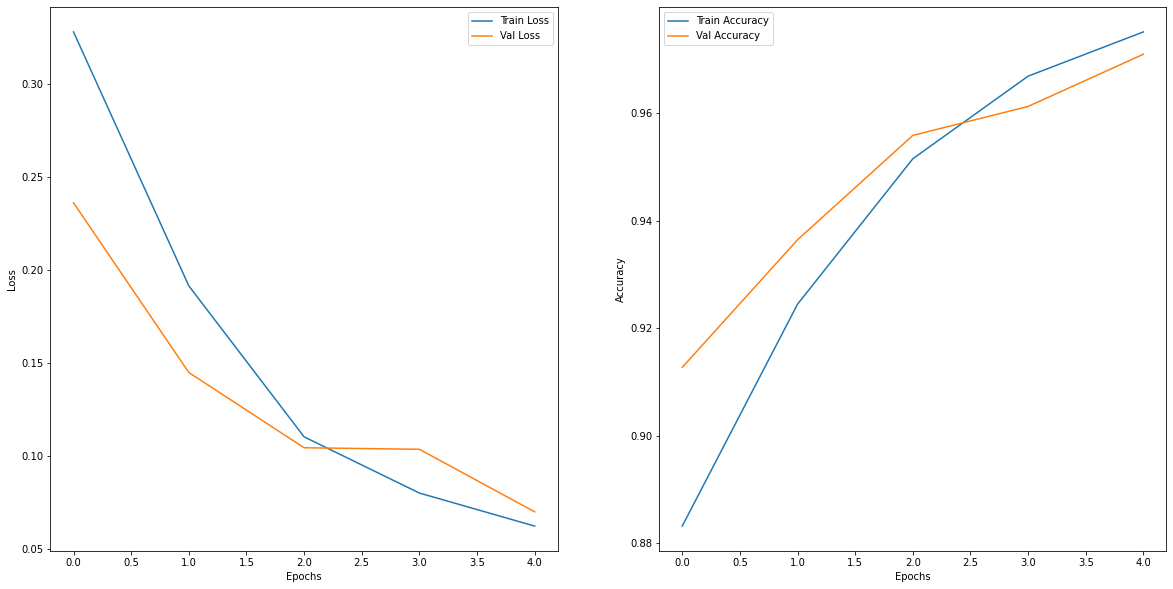

In [ ]:
train_losses = train_dict['train_losses']
train_accuracies = train_dict['train_accuracies']
val_losses = train_dict['val_losses']
val_accuracies = train_dict['val_Accuracies']

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [ ]:
audio_test1 = SpeechDataset(data_test)

In [ ]:
testloader = torch.utils.data.DataLoader(audio_test1, batch_size=32, shuffle=False)
plot_confusion_matrix(true_pred, test_prediction_dict["test_predictions"], labels)


100%|██████████| 33/33 [01:35<00:00,  2.89s/it]


{'test_acc': 0.7215909090909091, 'test_loss': 1.1860333453602807}

In [ ]:
test_prediction_dict = test_predict_classifier(model, testloader)


100%|██████████| 33/33 [01:34<00:00,  2.85s/it]


In [ ]:
print(test_prediction_dict["test_predictions"])

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 

In [ ]:
true_pred=[]
for i in data_test:
  true_pred.append(i[1])

print(true_pred)

[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    plots the confusion matrix
    """
    matrix = confusion_matrix(y_true, y_pred)    
    fig, ax = plt.subplots(figsize=(4,3))
    plt.imshow(matrix)
    ax.set_xticks(range(len(labels)));
    ax.set_xticklabels(labels, rotation=0)
    ax.set_yticks(range(len(labels)));
    ax.set_yticklabels(labels)
    max_confusions = 0
    confused_classes = (-1, -1)
    for i, true_label in enumerate(matrix):
        for j, predicted_label in enumerate(true_label):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="r");
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.title("Confusion Matrix");

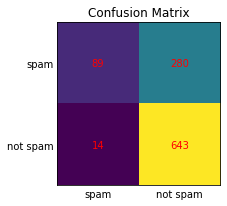

In [ ]:
labels =['spam','not spam']

plot_confusion_matrix(true_pred, test_prediction_dict["test_predictions"], labels)


100%|██████████| 47/47 [02:16<00:00,  2.91s/it]

100%|██████████| 47/47 [02:16<00:00,  2.91s/it]

[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 

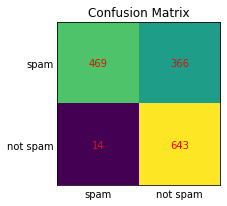

In [ ]:
data_test1 =[]
for i in range(0, len(test_df1['waveform'])):
  x = test_df1['waveform'][i]
  y = test_df1['label'][i]
  data_test1.append((x,y))

audio_test2 = SpeechDataset(data_test1)

testloader1 = torch.utils.data.DataLoader(audio_test2, batch_size=32, shuffle=False)
test_evaluate_classifier(model, testloader1)

test_prediction_dict1 = test_predict_classifier(model, testloader1)

true_pred1=[]
for i in data_test1:
  true_pred1.append(i[1])

print(true_pred1)

plot_confusion_matrix(true_pred1, test_prediction_dict1["test_predictions"], labels)

In [ ]:
print(test_evaluate_classifier(model, testloader1))


100%|██████████| 47/47 [02:13<00:00,  2.85s/it]

{'test_loss': 1.1680387765803235, 'test_acc': 0.7449468085106383}


In [ ]:
data_test2 =[]
for i in range(0, len(test_df2['waveform'])):
  x = test_df2['waveform'][i]
  y = test_df2['label'][i]
  data_test2.append((x,y))

audio_test3 = SpeechDataset(data_test2)

In [ ]:
testloader2 = torch.utils.data.DataLoader(audio_test3, batch_size=32, shuffle=False)


In [ ]:
test_df2['waveform'][10].shape
#test_df1['waveform'][10]

torch.Size([2, 33728])

In [ ]:
print(test_evaluate_classifier(model, testloader2))








  0%|          | 0/33 [00:00<?, ?it/s]

RuntimeError: ignored

In [ ]:
data_test3 =[]
for i in range(0, len(test_df3['waveform'])):
  x = test_df3['waveform'][i]
  y = test_df3['label'][i]
  data_test3.append((x,y))

audio_test4 = SpeechDataset(data_test3)

testloader3 = torch.utils.data.DataLoader(audio_test4, batch_size=32, shuffle=False)
print(test_evaluate_classifier(model, testloader3))

test_prediction_dict3 = test_predict_classifier(model, testloader3)

true_pred3=[]
for i in data_test3:
  true_pred3.append(i[1])

print(true_pred3)

plot_confusion_matrix(true_pred3, test_prediction_dict3["test_predictions"], labels)







  0%|          | 0/47 [00:00<?, ?it/s]ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-a2bca4e0d0f6>", line 10, in <module>
    print(test_evaluate_classifier(model, testloader3))
  File "/usr/local/lib/python3.7/dist-packages/wavencoder/trainer/classification_trainer.py", line 96, in test_evaluate_classifier
    for batch in tqdm(testloader):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/std.py", line 1104, in __iter__
    for obj in iterable:
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 517, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 557, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    

RuntimeError: ignored